In [1]:
from toolkit import *

from PathLoader import PathLoader

path_loader = PathLoader('data_config.env', 'current_user.env')

folder_name = 'SYPipelineScript'
condition = 'SY_test'

# open pickle files
with open(f'{path_loader.get_data_path()}data/results/{folder_name}/total_df_{condition}.pkl', 'rb') as f:
    total_df = pickle.load(f)
    
with open(f'{path_loader.get_data_path()}data/results/{folder_name}/meta_df_{condition}.pkl', 'rb') as f:
    meta_df = pickle.load(f)
    
with open(f'{path_loader.get_data_path()}data/results/{folder_name}/rngs_list_{condition}.pkl', 'rb') as f:
    rngs_list = pickle.load(f)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
adjust_for_accuracy = True
df = total_df

# filter the dataframe by condition
df = df[df['condition'] == condition]

feature_importance = df['feature_importance']
rngs = df['rng']
accuracies = df['model_performance']

data_collector = []

# for each row in the feature importance column, append tuple (feature_name, score) to a list
accuracy_tuples = []
for fi_row, rng_row, accuracies in zip(feature_importance, rngs, accuracies):
    for feature_name, score in zip(fi_row[0], fi_row[1]):
        data_collector.append({'iteration_no': rng_row, 'feature_names': feature_name, 'scores': score})
        if adjust_for_accuracy:
            accuracy_tuples.append((feature_name, accuracies))

# convert the list to a dataframe
feature_importance_df = pd.DataFrame(data_collector)

# if adjust_for_accuracy is False, set accuracy_tuples to None
if not adjust_for_accuracy:
    accuracy_tuples = None

In [2]:
new_kit = Powerkit(None,None)

mean_contribution = new_kit.get_mean_contribution(total_df, condition, strict_mean=0.25)

In [3]:
mean_variation = get_variation(total_df, condition, use_iqr=True, strict_mean=0.25)

In [4]:
mean_performance = total_df.groupby('condition')['model_performance'].mean()[condition]

mean_performance

0.555500652806487

<AxesSubplot: xlabel='mean', ylabel='feature'>

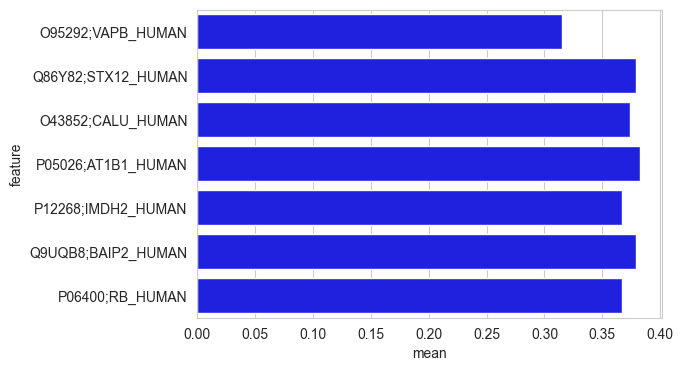

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style('whitegrid')

# plot mean and iqr of feature importance
fig, ax = plt.subplots(figsize=(6, 4))

# plot the mean in mean_variation
sns.barplot(x=mean_variation['mean'], y=mean_variation.index, color='blue', label='mean')


<AxesSubplot: xlabel='count', ylabel='feature'>

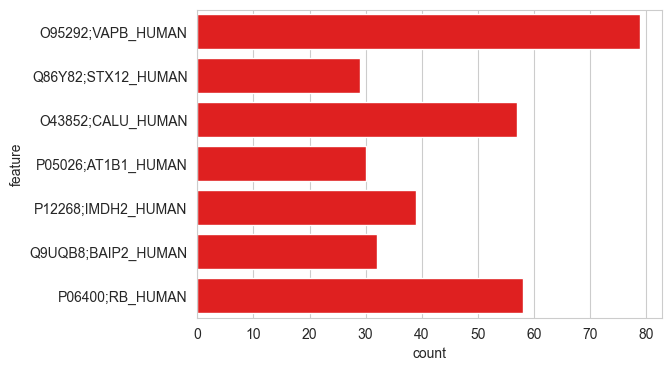

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style('whitegrid')

# plot mean and iqr of feature importance
fig, ax = plt.subplots(figsize=(6, 4))

# plot the mean in mean_variation
sns.barplot(x=mean_variation['count'], y=mean_variation.index, color='red', label='mean')


<AxesSubplot: xlabel='variability_score', ylabel='feature'>

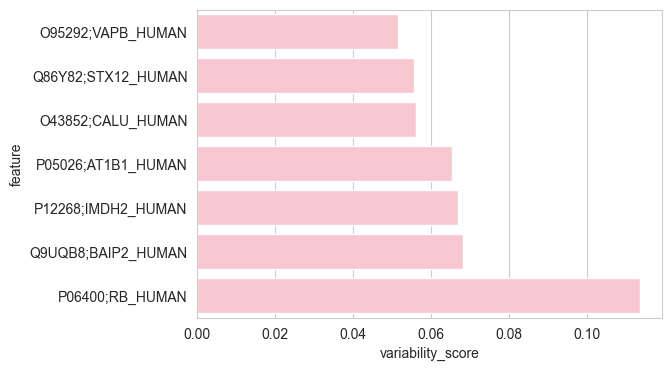

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the style of the axes and the text color
sns.set_style('whitegrid')

# plot mean and iqr of feature importance
fig, ax = plt.subplots(figsize=(6, 4))

# plot the mean in mean_variation
sns.barplot(x=mean_variation['variability_score'], y=mean_variation.index, color='pink', label='mean')


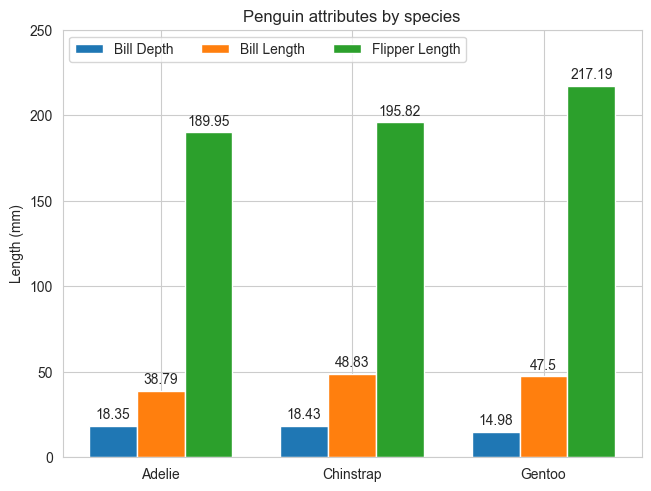

In [8]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

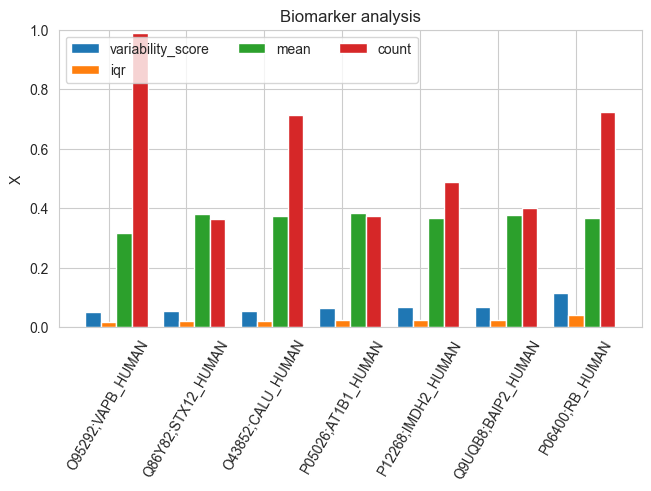

In [9]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

mean_variation = get_variation(total_df, condition, use_iqr=True, strict_mean=0.25)
mean_variation['count'] = mean_variation['count'] / 80
# min-max normalization for other attributes

biomarkers = mean_variation.index 

data = {}

for col in mean_variation.columns:
    data[col] = mean_variation[col].values


x = np.arange(len(biomarkers))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('X')
ax.set_title('Biomarker analysis')
ax.set_xticks(x + width, biomarkers)
ax.legend(loc='upper left', ncols=3)

# vertical x axis labels
ax.set_xticklabels(biomarkers, rotation=60)

ax.set_ylim(0, 1)

plt.show()
    
    
